In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [7]:
credit_train = pd.read_csv('C:/Users/rayad/Downloads/train_s3TEQDk.csv')

In [8]:
credit_train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [9]:
credit_train = credit_train.iloc[:, 1:]

In [10]:
credit_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [11]:
test = pd.read_csv('C:/Users/rayad/Downloads/test_mSzZ8RL.csv')

In [12]:
test.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes
105311,F2NOYPPZ,Male,27,RG256,Salaried,X1,21,No,591565,No


In [16]:
print("Length of Train Data: ", len(credit_train))
print('Length of Test Data: ', len(test))

Length of Train Data:  245725
Length of Test Data:  105312


In [17]:
credit_test = test.iloc[:, 1:]

In [18]:
missing_val = credit_train.isna().sum() * 100/len(credit_train)
missing_val

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [20]:
credit_train = credit_train.fillna(credit_train.Credit_Product.mode())

In [21]:
missing_val_test = credit_test.isna().sum() * 100/len(credit_test)
missing_val_test

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [22]:
credit_test = credit_test.fillna(credit_test.Credit_Product.mode())

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
col_obj = credit_train.select_dtypes(include='object').columns

In [26]:
for col in col_obj:
    credit_train[col] = le.fit_transform(credit_train[col])
    
for col in col_obj:
    credit_test[col] = le.fit_transform(credit_test[col])

In [27]:
credit_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [28]:
credit_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,742366,0
1,1,43,18,1,1,49,2,925537,0
2,1,31,20,2,0,14,0,215949,0
3,1,29,22,1,0,33,0,868070,0
4,0,29,20,1,0,19,0,657087,0


In [29]:
X = credit_train.drop(columns='Is_Lead', axis=1)
Y = credit_train['Is_Lead']

In [30]:

print(Y.value_counts())

0    187437
1     58288
Name: Is_Lead, dtype: int64


### SMOTE OverSampling

In [31]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X, Y)

In [32]:
Y_sm.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

### Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.2, random_state=12, stratify=Y_sm)

In [35]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    149950
1    149949
Name: Is_Lead, dtype: int64
1    37488
0    37487
Name: Is_Lead, dtype: int64


In [36]:
model_lr = LogisticRegression()

In [37]:
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [38]:
model_lr_pred_test = model_lr.predict(X_test)

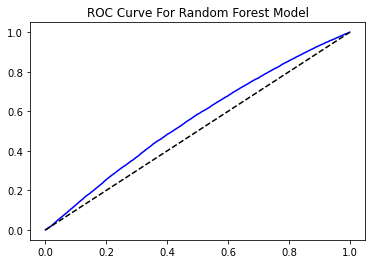

In [39]:
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:, 1])
auc_lr_test = roc_auc_score(Y_test, model_lr_pred_test)

plt.plot(fpr, tpr, color = 'blue', label = "Logistic Regression (area = 0.2f)"%auc_lr_test)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel = ("False Positive Rate")
plt.ylabel = ("True Positive Rate")
plt.title("ROC Curve For Random Forest Model")
plt.show()


In [40]:
auc_lr_test*100

50.0

In [41]:
model_lr_pred_train = model_lr.predict(X_train)

In [42]:
auc_lr_train = roc_auc_score(Y_train, model_lr_pred_train)

In [43]:
auc_lr_train*100

50.0

In [44]:
print(classification_report(Y_test, model_lr_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     37487
           1       0.50      1.00      0.67     37488

    accuracy                           0.50     74975
   macro avg       0.25      0.50      0.33     74975
weighted avg       0.25      0.50      0.33     74975



### Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()

In [47]:
model_rfc = rfc.fit(X_train, Y_train)

#### Predictions on Test Data

In [48]:
model_rfc_pred_test = model_rfc.predict(X_test)

### ROC Curve for Random Forest Model

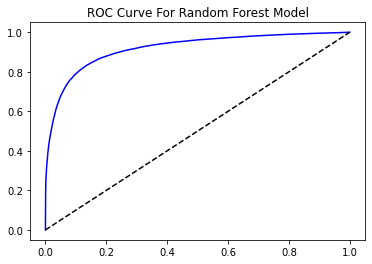

In [49]:
fpr, tpr, thresholds = roc_curve(Y_test, model_rfc.predict_proba(X_test)[:, 1])
auc_rf_test = roc_auc_score(Y_test, model_rfc_pred_test)

plt.plot(fpr, tpr, color = 'blue', label = "Logistic Regression (area = 0.2f)"%auc_rf_test)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel = ("False Positive Rate")
plt.ylabel = ("True Positive Rate")
plt.title("ROC Curve For Random Forest Model")
plt.show()


#### AUC for Random Forest - Test data

In [50]:
auc_rf_test*100

84.82829215337259

In [51]:
print(classification_report(Y_test, model_rfc_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     37487
           1       0.86      0.84      0.85     37488

    accuracy                           0.85     74975
   macro avg       0.85      0.85      0.85     74975
weighted avg       0.85      0.85      0.85     74975



#### Predictions on Train Data

In [52]:
model_rfc_pred_train = model_rfc.predict(X_train)

#### AUC for Random Forest - Train data

In [53]:
auc_train = roc_auc_score(Y_train, model_rfc_pred_train)
auc_train*100

99.99666553294787

### Random Forest Submission

In [54]:
test_pred_rfc = model_rfc.predict(credit_test)

In [56]:
test_pred_df = pd.DataFrame(test_pred_rfc)

In [57]:
test_pred_df.columns = ['Is_Lead']

In [58]:
sub_id = test['ID']

In [59]:
sub_id

0         VBENBARO
1         CCMEWNKY
2         VK3KGA9M
3         TT8RPZVC
4         SHQZEYTZ
            ...   
105307    DBENJOYI
105308    CWQ72DWS
105309    HDESC8GU
105310    2PW4SFCA
105311    F2NOYPPZ
Name: ID, Length: 105312, dtype: object

In [60]:
sub_rfc = pd.concat([sub_id, test_pred_df], axis=1)

In [62]:
sub_rfc

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [64]:
#sub_rfc.to_csv("Random_Forest_Predictions.csv", index=False)

### XGBM Model

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb = XGBClassifier(n_estimators = 200)

In [67]:
model_xgb = xgb.fit(X_train, Y_train)

[13:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Predictions on Test Data

In [69]:
model_xgb_pred_test = model_xgb.predict(X_test)

In [70]:
predictions_test = [round(value) for value in model_xgb_pred_test]

### ROC Curve for XGBM Model

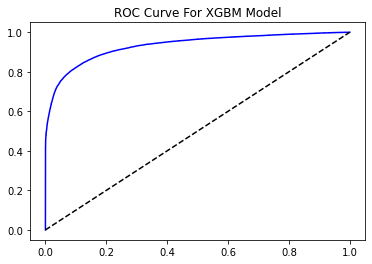

In [72]:
fpr, tpr, thresholds = roc_curve(Y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_test_xgb = roc_auc_score(Y_test, predictions_test)

plt.plot(fpr, tpr, color = 'blue', label = "Logistic Regression (area = 0.2f)"%auc_test_xgb)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel = ("False Positive Rate")
plt.ylabel = ("True Positive Rate")
plt.title("ROC Curve For XGBM Model")
plt.show()


#### AUC for XGBM - Test Data

In [73]:
auc_test_xgb*100

86.05138837517165

#### Predictions on Train Data

In [74]:
model_xgb_pred_train = model_xgb.predict(X_train)
predictions_train = [round(value) for value in model_xgb_pred_train]

#### AUC of XGBM on Train Data

In [75]:
auc_train_xgb = roc_auc_score(Y_train, predictions_train)

In [76]:
auc_train_xgb*100

87.1656695009103

In [78]:
print(classification_report(Y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     37487
           1       0.88      0.83      0.86     37488

    accuracy                           0.86     74975
   macro avg       0.86      0.86      0.86     74975
weighted avg       0.86      0.86      0.86     74975



In [80]:
pred_xgb = pd.DataFrame(model_xgb.predict(credit_test))

In [81]:
pred_xgb.columns = ['Is_Lead']

In [82]:
xgb_pred = pd.concat([sub_id, pred_xgb], axis=1)

In [84]:
#xgb_pred.to_csv("XGBM_Predicitions.csv", index=False)

### SVM Model

In [85]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [86]:
# model_svm = SVC()
# param_grid = [{'kernel':['poly'],'C':[10,0.1,15] }]
# gsv = GridSearchCV(model_svm,param_grid,cv=10)
# gsv.fit(X_train, Y_train)

In [88]:
model_svc = SVC(C=0.1, kernel="poly")

In [ ]:
model_svc.fit(X_train, Y_train)